In [ ]:
'''
Name: Subash Gupta Karamsetty
Znumber: Z23689645
Assignment Number: 7
Professor: Dr. Ghoraani

This is my Colab file link:
https://colab.research.google.com/drive/1hKFqqihwUBfz6kvTQuvJ_q3XMbG0hv1C
'''

In [3]:
import numpy as np #importing numpy module
import matplotlib.pyplot as plt #importing pyplot module to plot the graphs

In [4]:
class NeuralNetwork_GD:
    def __init__(self,learning_r): #I am passing the learning rate using the for loop.
        np.random.seed(1) #This will help in making the weights constant overall
        self.learning_r = learning_r
        self.weights = 2*np.random.random((3,1)) - 1 #creating the weights using random module

    def sigmoid(self,x):
        return 1/(1+np.exp(-x)) #the sigmoid function formula.

    def forward_propagation(self, inputs):
        vals = np.dot(inputs, self.weights) #doing the dot product which multiplies both the values and find the sum of all the values.
        return self.sigmoid(vals)

    def train(self, inputs_train, labels_train, num_train_iterations = 50): #defaulted the iterations to fifty (50) as asked in the question
        costs=np.array([]) #creating an empty array
        N=inputs_train.shape[0]
        iters = num_train_iterations
        for i in range(iters):
            fieldvalue = self.forward_propagation(inputs_train) #first finding the summation value i.e., output of the summing fuction and then collecting the activation function.
            error = labels_train - fieldvalue #the error value calculation (d-y)values
            deviation_weights = (self.learning_r/N)*np.sum(np.multiply(error,inputs_train),axis=0) #delta weights formula.
            self.weights[:,0] += deviation_weights #updating the weights for the next iteration.
            costfn_val = (1/N)*(np.sum(np.square(error))) #finding the cost function for the current iteration.
            costs = np.append(costs,costfn_val) #saving the cost function value of the current iteration for the plot.
        print("Plot of the Final Clasifier Line at the final iteration {} is".format(i+1))
        plot_func_line(inputs_train[:,1:3], labels_train[:,0], self.weights[:,0]) #Final classifer plot.
        print("The cost function plot after considering all the {} iterations is ".format(i+1))
        plot_cost(costs, iters) #cost function plot.

def plot_cost(costs,num_train_iterations):
    iterations1 = np.arange(num_train_iterations, dtype = int) #creating an array so that we can plot the iterations
    plt.plot(iterations1, costs)
    #plt.axis([-0.3,num_train_iterations, -0.3, np.max(costs)+1]) #commenting it out as this is not making the graph look presentable. the y axis is making it to look bad and unable to see the steepness of the curve if we use it.
    plt.title("Learning Curve")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost function J(θ)")
    plt.show()

def plot_func_line(inputs_train, labels_train, weights, classes=[0,1]):
    plt.plot(inputs_train[labels_train[:] == classes[0],0],inputs_train[labels_train[:] == classes[0],1], 'gs',  label = "Class {}".format(classes[0])) #gs refers to green squares selecting the class 0 samples
    plt.plot(inputs_train[labels_train[:] == classes[1],0],inputs_train[labels_train[:] == classes[1],1], 'ro',  label = "Class {}".format(classes[1])) #ro refers to red circles selecting the class 1 samples
    plt.axis([-2, 3, -2,4]) #Adjusting the axis based on the input samples.
    x1=np.linspace(-1,2,50) #Creating a line points for the x-axis
    x2= -(weights[1]*x1 + weights[0])/weights[2] # W1X1+W2X2+W0=0 --> X2= -(W1X1+W0)/W2
    plt.plot(x1,x2, '-v') #plotting the line points
    plt.xlabel("Feature X1")
    plt.ylabel("Feature X2")
    plt.title("Final Classifier Line Plot")
    plt.legend()
    plt.show()

def original_plot(inputs_train, labels_train, classes=[0,1]):
    plt.plot(inputs_train[labels_train[:] == classes[0],0],inputs_train[labels_train[:] == classes[0],1], 'gs',  label = "Class {}".format(classes[0])) #gs refers to green squares selecting the class 0 samples
    plt.plot(inputs_train[labels_train[:] == classes[1],0],inputs_train[labels_train[:] == classes[1],1], 'ro',  label = "Class {}".format(classes[1])) #ro refers to red circles selecting the class 1 samples
    plt.axis([-2, 3, -2,4]) #Adjusting the axis based on the input samples.
    plt.xlabel("Feature X1")
    plt.ylabel("Feature X2")
    plt.title("Original Plot With the given data points")
    plt.legend()
    plt.show()

We have 10 inputs given with their corresponding labels
Inputs given:
[[ 1.   1. ]
 [ 1.   0. ]
 [ 0.   1. ]
 [ 0.5 -1. ]
 [ 0.5  3. ]
 [ 0.7  2. ]
 [-1.   0. ]
 [-1.   1. ]
 [ 2.   0. ]
 [ 0.   0. ]]
Corresponding Labels given:
[1 1 0 0 1 1 0 0 1 0]


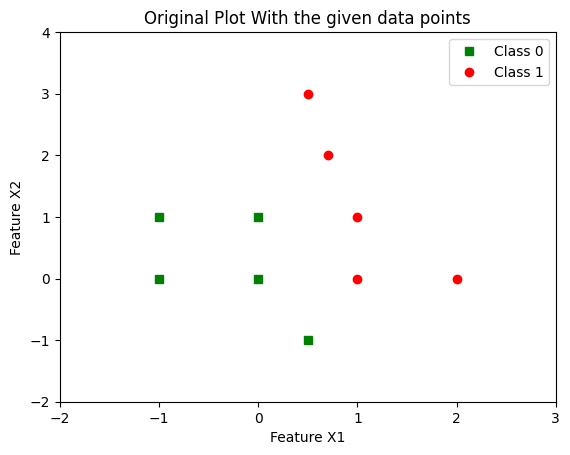

In [5]:
inputs = np.array([[1, 1], [1, 0], [0, 1], [0.5, -1], [0.5, 3], [0.7, 2], [-1, 0], [-1, 1], [2, 0], [0, 0]])
print("We have {} inputs given with their corresponding labels".format(inputs.shape[0]))
print("Inputs given:")
print(inputs)
labels = np.array([1,1,0,0,1,1,0,0,1,0])
print("Corresponding Labels given:")
print(labels)
original_plot(inputs,labels)

In [6]:
bias = np.ones((labels.shape[0],1))
print("We need to add the bias. The bias array is: ")
print(bias)
print("Shape of the bias is :", bias.shape)
inputsfinal = np.append(bias,inputs,axis=1)
print("The final input array after adding the bias is : ")
print(inputsfinal)
print("shape of the bias is :",inputsfinal.shape)

We need to add the bias. The bias array is: 
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Shape of the bias is : (10, 1)
The final input array after adding the bias is : 
[[ 1.   1.   1. ]
 [ 1.   1.   0. ]
 [ 1.   0.   1. ]
 [ 1.   0.5 -1. ]
 [ 1.   0.5  3. ]
 [ 1.   0.7  2. ]
 [ 1.  -1.   0. ]
 [ 1.  -1.   1. ]
 [ 1.   2.   0. ]
 [ 1.   0.   0. ]]
shape of the bias is : (10, 3)


The learning rate is : 1
Initial Weights when the lerning rate = 1 is : [[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
Plot of the Final Clasifier Line at the final iteration 50 is


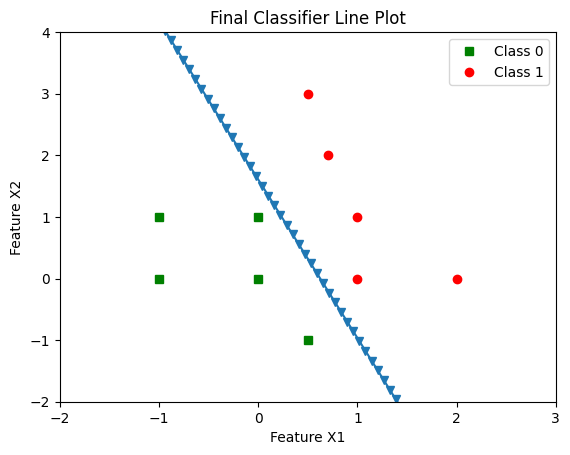

The cost function plot after considering all the 50 iterations is 


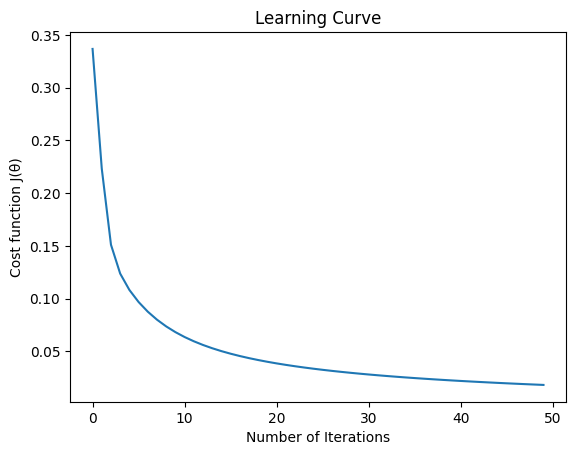

Final Weights when the learning rate = 1 is : [[-2.16960572]
 [ 3.46870407]
 [ 1.34808305]]
--------------------------------------------------------------------------------
The learning rate is : 0.5
Initial Weights when the lerning rate = 0.5 is : [[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
Plot of the Final Clasifier Line at the final iteration 50 is


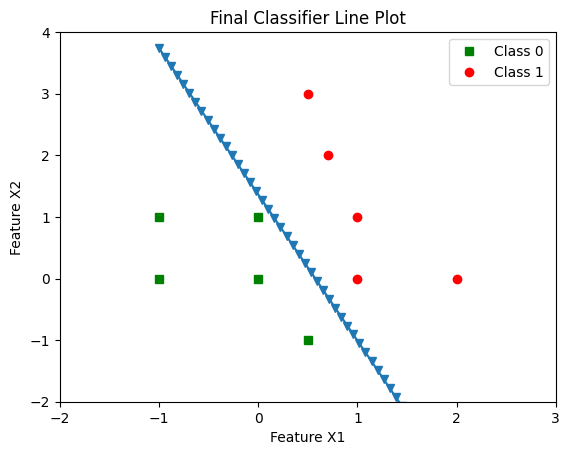

The cost function plot after considering all the 50 iterations is 


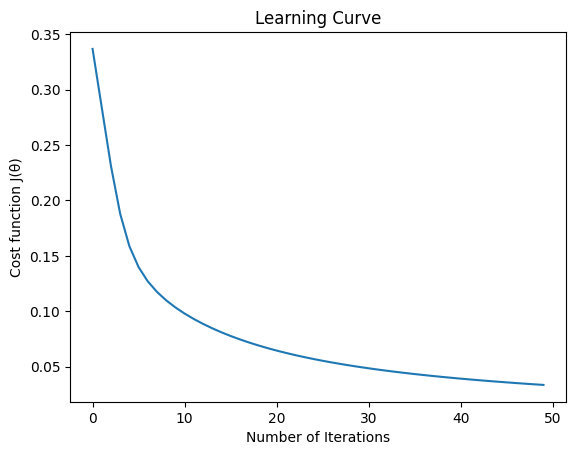

Final Weights when the learning rate = 0.5 is : [[-1.47953369]
 [ 2.56651734]
 [ 1.08127652]]
--------------------------------------------------------------------------------
The learning rate is : 0.1
Initial Weights when the lerning rate = 0.1 is : [[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
Plot of the Final Clasifier Line at the final iteration 50 is


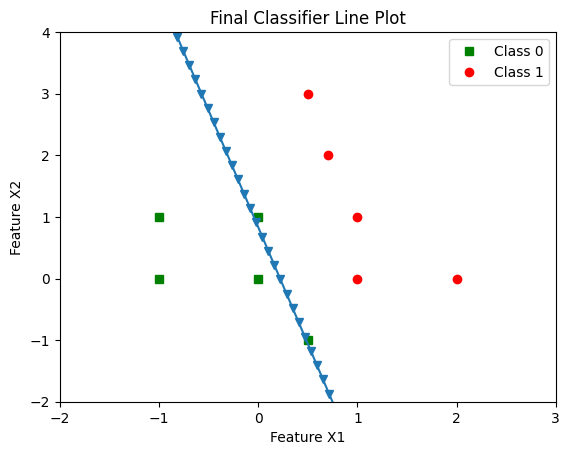

The cost function plot after considering all the 50 iterations is 


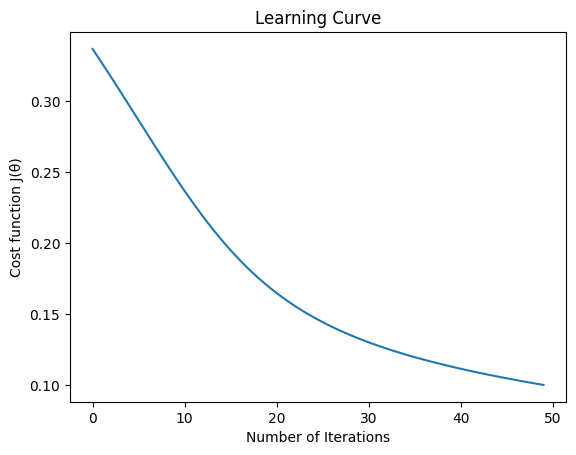

Final Weights when the learning rate = 0.1 is : [[-0.28643485]
 [ 1.29840869]
 [ 0.34286026]]
--------------------------------------------------------------------------------
The learning rate is : 0.01
Initial Weights when the lerning rate = 0.01 is : [[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
Plot of the Final Clasifier Line at the final iteration 50 is


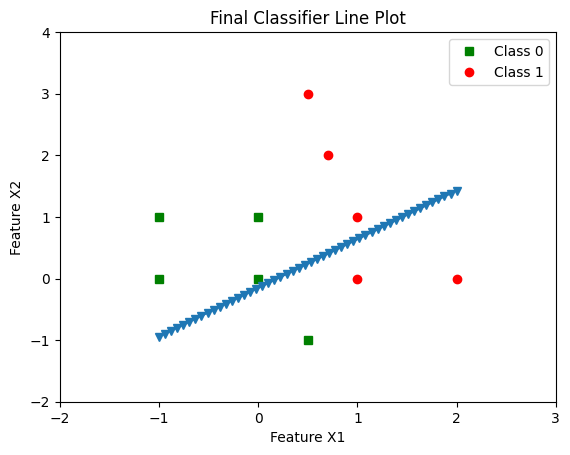

The cost function plot after considering all the 50 iterations is 


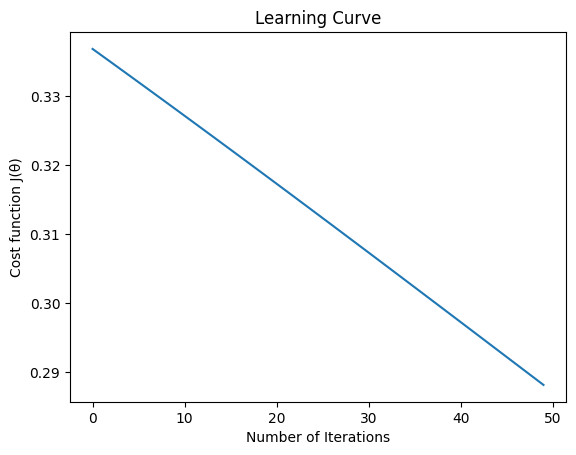

Final Weights when the learning rate = 0.01 is : [[-0.1122277 ]
 [ 0.58096448]
 [-0.73483257]]
--------------------------------------------------------------------------------


In [7]:
lrates = [1,0.5,0.1,0.01]
for i in lrates:
    print("The learning rate is :",i)
    ntwk = NeuralNetwork_GD(i)
    print("Initial Weights when the lerning rate = {} is : {}".format(i,ntwk.weights))
    ntwk.train(inputsfinal,np.expand_dims(labels, axis=1))
    print("Final Weights when the learning rate = {} is : {}".format(i,ntwk.weights))
    print("-"*80)


In [ ]:
'''
To answer the question, Out of all the 4 learning rates used, I find learning rate 1 to be more efficient and suitable when compared with the others. The learning rate of 0.5 is the second-best.
The reason for selecting this is that when the learning rate is 1, in the cost function plot, there is a huge steepness, i.e., faster convergence, in the initial iterations, i.e.,
The error values reduced rapidly at first, and then they converged to lower values as the iterations went on and maintained no big change at the higher iterations, and the error values are near zero but not zero.
There are no oscializations or overshootings here. The cost function curve when the learning rate is 0.1 and 0.01 is not good as the curve is not showing any good change to reduce the error nearly to zero.
When the rates are very low, the iterations needed are more, which leads to slower convergence during training, but we can say it is stable. But after 50 iterations, I don't see it reducing error values; hence, I say they are not good.
'''

In [ ]:
#Completed.
# Below code will help me in downloading the code file with graphs as PDF properly.
#Referred from youtube link: https://www.youtube.com/watch?v=-Ti9Mm21uVc

In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

In [ ]:
!jupyter nbconvert --to pdf /content/Assignment7_CAP6619_SubashGuptaKaramsetty_Z23689645.ipynb